# Assignment2 - Supervised Learning flow

# Part 1(a) Student details:
* Please write the First-Name, First letter of Last-Name and last 4 digits of the i.d. for each student. 

In [1]:
# stundent details example: John S. 9812
#                       student details 1: Shalev O. 9298
# (if exists)           student details 2: 
# (if exists)           student details 3: 
# (if exists&premitted) student details 4: 

## Part 1(b) - Chat-GPT/other AI-agent/other assistance used:
* If you changed the prompt until you got a satisfying answer, please add all versions
* don't delete "pre" tags, so new-line is supported
* double click the following markdown cell to change
* press shift+enter to view
* Add information:

#### Add information in this Markdown cell (double click to change, shift-enter to view)
<pre> 
AI agent name: vs copilot
Goal: Make small fixes to functions and check variable accuracy to the methods during the project


Prompt1: Suggest visualizations to present the data (such as countplots, histograms, correlation heatmaps, and graphs) to better understand the dataset and model results.
Prompt2: Make code to normalize features and add new engineered columns to the Titanic dataset in pandas.
Prompt3: Make a function to add a 'FamilySize' feature (SibSp + Parch + 1) to a DataFrame.
Prompt4: Make a function to normalize selected numeric features in a DataFrame using MinMaxScaler.
Prompt5: Make code to use GridSearchCV with StratifiedKFold (with random_state for reproducibility) to tune hyperparameters for a KNeighborsClassifier on the Titanic dataset, and display the cross-validation results as a DataFrame.
Prompt6: Make code to display model predictions versus true labels for a specific range of test set indices.
Prompt7: Make code to update code cells for new feature engineering steps and explain the impact of new features.
Prompt8: Make code to refactor code for better readability and maintainability.
Prompt9: Make explanation for the difference between F1 and F1-macro scores in classification tasks.
Prompt10: Make explanation about how different features affect model performance in Random Forest, Decision Tree, and KNN.
Prompt11: Make explanation about the main hyperparameters in Random Forest, Decision Tree, and KNN, and how they influence the results.
Prompt12: Make code to create visualizations (such as countplots, histograms, correlation heatmaps, and decision boundaries) to better understand the data and model results.
Prompt13: Make code to visualize feature importance in Random Forest and Decision Tree models.
Prompt14: Make code to run machine learning models using 5-fold cross-validation (StratifiedKFold) and show the results.
Prompt15: Make a function that takes the Random Forest model, the best features, and best parameters, and trains the model on the entire dataset.
Prompt16: Make a loop that checks all best feature combinations for Decision Trees and Random Forests, evaluating each with cross-validation and saving the results.

AI agent name 2: chat gpt
Goal: Give advices and general explanations (advantages and disadvantages) on different methods used during the experiment part.


Prompt1: Make explanation for the pros and cons of using Random Forest vs. Decision Tree for Titanic survival prediction.
Prompt2: Make explanation about how the random_state parameter affects reproducibility in scikit-learn experiments.
Prompt3: Make explanation about how to interpret F1-macro scores and confusion matrices in binary classification tasks.
Prompt4: Make explanation about the importance of feature engineering and the effect of each feature on model performance.
Prompt5: Make explanation for the difference between F1 and F1-macro, and when each should be used.
Prompt6: Make explanation about the main features and hyperparameters that impact the performance of the models used in this project.
Prompt7: Make code and explanation to visualize data distributions, feature correlations, and model decision boundaries for better interpretation.
Prompt8: Make explanation about the differences between Random Forest and Decision Tree models, including their advantages, disadvantages, and when to use each.

Other assistance: None
</pre>

## Part 1(c) - Learning Problem and dataset explaination.
* Please explain in one paragraph
* don't delete "pre" tags, so new-line is supported
* double click the following markdown cell to change
* press shift+enter to view
* Add explaining text:

#### Add information in this Markdown cell (double click to change, shift-enter to view)

<pre>
Explanation of the Learning Problem and the Dataset:
This project addresses a binary classification problem, where the goal is to predict whether a passenger who boarded 
the Titanic survived (Survived = 1) or not (Survived = 0), based on personal attributes and travel conditions.
Two datasets are used: the training set contains 712 examples, and the test set contains 179 examples.
Each example is described by 7 features: passenger class (Pclass), sex (Sex – encoded numerically), age (Age), number of siblings/spouses aboard (SibSp),
number of parents/children aboard (Parch), ticket fare (Fare), and port of embarkation (Embarked – also numerically encoded).
The goal of the learning process is to develop an accurate model capable of predicting passenger survival based on these features.
</pre>




## Part 2 - Initial Preparations 
You could add as many code cells as needed

In [2]:
# Import required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import GridSearchCV, StratifiedKFold, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler , MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import make_scorer, f1_score
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier



In [3]:


# Load the training and test datasets
train_df = pd.read_csv('titanic_train.csv')
test_df = pd.read_csv('titanic_test.csv')

# Display the first few rows of each dataset
print("Train Dataset Preview:")
print(train_df.head())

print("\nTest Dataset Preview:")
print(test_df.head())


Train Dataset Preview:
   Pclass  Sex   Age  SibSp  Parch     Fare  Embarked  Survived
0       1    0  54.0      1      0  78.2667         1         1
1       2    0  45.0      0      0  13.5000         0         1
2       3    1  20.0      0      0   9.5000         0         0
3       3    1  36.0      0      0   7.8958         0         0
4       3    1  22.0      0      0   8.0500         0         0

Test Dataset Preview:
   Pclass  Sex        Age  SibSp  Parch     Fare  Embarked  Survived
0       3    1  35.000000      0      0   7.0500         0         0
1       3    1  30.000000      0      0   7.2500         0         0
2       3    1  29.699118      0      0  14.5000         0         0
3       3    0  21.000000      0      0   7.7500         2         0
4       3    1  32.000000      0      0  56.4958         0         1


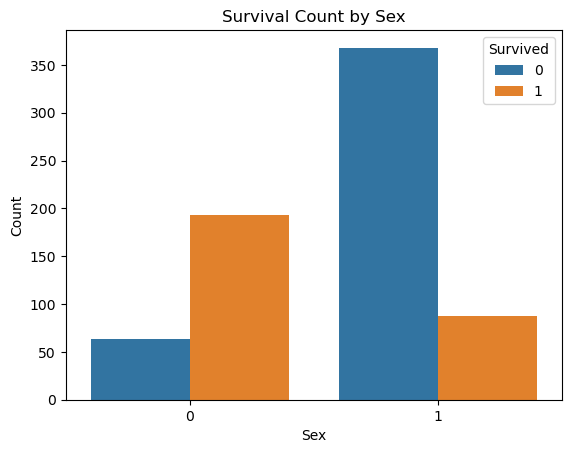

In [4]:
sns.countplot(x='Sex', hue='Survived', data=train_df)  # Create a bar plot showing the count of survivors and non-survivors for each sex
plt.title('Survival Count by Sex')                      # Set the title of the plot
plt.xlabel('Sex')                                       # Label for the x-axis
plt.ylabel('Count')                                     # Label for the y-axis
plt.legend(title='Survived')                            # Add a legend to indicate which color represents survival
plt.show()                                              # Display the plot

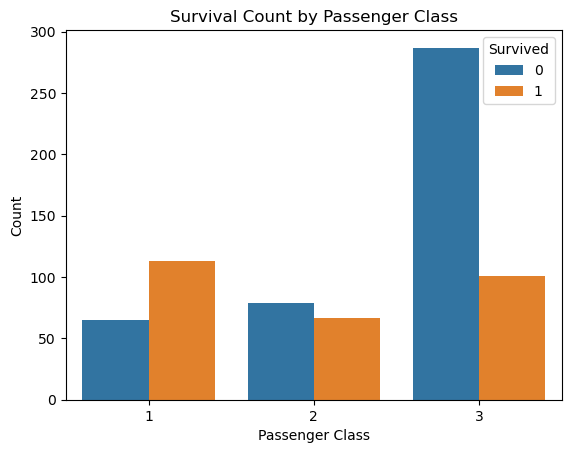

In [5]:
# Plot the count of survivors and non-survivors for each passenger class (Pclass)
# This visualization helps to understand how passenger class (1st, 2nd, 3rd) relates to survival rates.

sns.countplot(x='Pclass', hue='Survived', data=train_df)
plt.title('Survival Count by Passenger Class')  # Set the title of the plot
plt.xlabel('Passenger Class')                   # Label for the x-axis
plt.ylabel('Count')                             # Label for the y-axis
plt.legend(title='Survived')                    # Add a legend with the title 'Survived'
plt.show()                                      # Display the plot

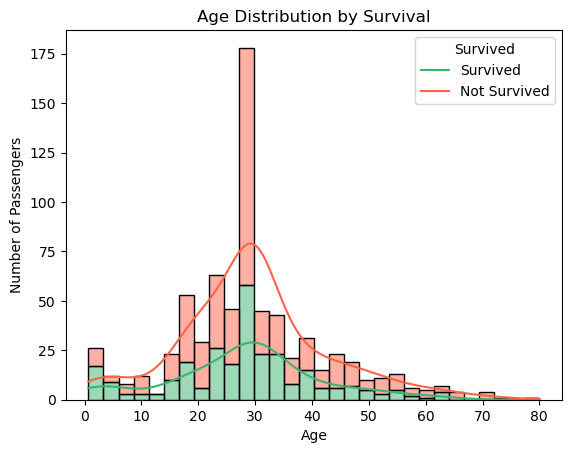

In [6]:
# Remove missing values in Age
age_df = train_df[['Age', 'Survived']].dropna()

# Define color palette: 0 = red (top), 1 = green (bottom)
palette = {0: 'tomato', 1: 'mediumseagreen'}

# Plot histogram with controlled stacking order
sns.histplot(data=age_df, x='Age', hue='Survived', kde=True, bins=30,
             multiple='stack', palette=palette, hue_order=[0, 1])

plt.title('Age Distribution by Survival')
plt.xlabel('Age')
plt.ylabel('Number of Passengers')
plt.legend(title='Survived', labels=['Survived', 'Not Survived'])
plt.show()


In [7]:

# Compute correlation matrix with 'Pclass' included
correlation = train_df[['Survived', 'Pclass', 'Age', 'Fare']].corr()

# Display as styled table (works best in Jupyter)
correlation.style.background_gradient(cmap='coolwarm').format(precision=2)




,Survived,Pclass,Age,Fare
Survived,1.00,-0.32,-0.07,0.26
Pclass,-0.32,1.00,-0.32,-0.54
Age,-0.07,-0.32,1.00,0.07
Fare,0.26,-0.54,0.07,1.00


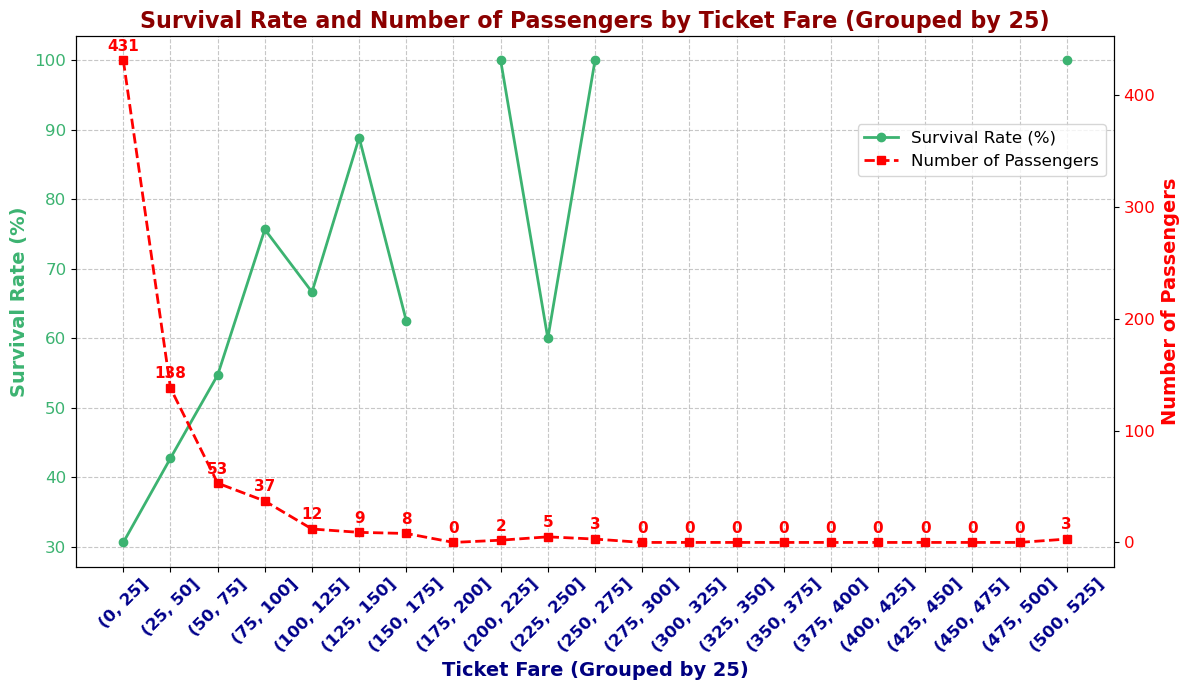

In [8]:


# Handle missing values in the 'Fare' column by filling them with the median
train_df["Fare"] = train_df["Fare"].fillna(train_df["Fare"].median())

# Create fare groups with 25-unit intervals
fare_bins = list(range(0, int(train_df["Fare"].max()) + 25, 25))
train_df["FareGroup"] = pd.cut(train_df["Fare"], bins=fare_bins)

# Calculate the survival rate for each fare group
survival_rates = train_df.groupby("FareGroup", observed=False)["Survived"].mean() * 100

# Calculate the number of passengers in each fare group
passenger_counts = train_df["FareGroup"].value_counts().sort_index()

# Create a visualization
fig, ax1 = plt.subplots(figsize=(12, 7))

# Survival rate line (green)
ax1.plot(
    survival_rates.index.astype(str),
    survival_rates.values,
    marker='o',
    linestyle='-',
    color='mediumseagreen',
    label='Survival Rate (%)',
    linewidth=2
)
ax1.set_xlabel("Ticket Fare (Grouped by 25)", fontsize=14, fontweight='bold', color='navy')
ax1.set_ylabel("Survival Rate (%)", fontsize=14, fontweight='bold', color='mediumseagreen')
ax1.tick_params(axis='y', labelcolor='mediumseagreen', labelsize=12)
ax1.set_xticks(range(len(survival_rates.index)))
ax1.set_xticklabels(survival_rates.index.astype(str), rotation=45, fontsize=12, fontweight='bold', color='darkblue')

# Number of passengers line (red, secondary y-axis)
ax2 = ax1.twinx()
ax2.plot(
    passenger_counts.index.astype(str),
    passenger_counts.values,
    marker='s',
    linestyle='--',
    color='red',
    label='Number of Passengers',
    linewidth=2
)
ax2.set_ylabel("Number of Passengers", fontsize=14, fontweight='bold', color='red')
ax2.tick_params(axis='y', labelcolor='red', labelsize=12)
ax2.set_xticks(range(len(passenger_counts.index)))
ax2.set_xticklabels(passenger_counts.index.astype(str), rotation=45, fontsize=12, fontweight='bold', color='red')

# Add data labels to the red line (number of passengers)
for i, (x, y) in enumerate(zip(passenger_counts.index.astype(str), passenger_counts.values)):
    ax2.text(i, y + max(passenger_counts.values)*0.02, str(y), color='red', fontsize=11, fontweight='bold', ha='center')

# Title and grid
plt.title("Survival Rate and Number of Passengers by Ticket Fare (Grouped by 25)", fontsize=16, fontweight='bold', color='darkred')
ax1.grid(True, linestyle='--', alpha=0.7)

# Legends (upper right)
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(
    lines_1 + lines_2,
    labels_1 + labels_2,
    loc='upper right',
    bbox_to_anchor=(1, 0.85),
    fontsize=12
)

plt.tight_layout()
plt.show()

## Part 3 - Experiments
You could add as many code cells as needed

In [9]:

# Feature Engineering 

def add_family_size(df):
    # Create a copy of the DataFrame to avoid modifying the original data
    # Adds a 'FamilySize' column: total family members aboard (SibSp + Parch + 1)
    # This feature helps capture the effect of traveling with family on survival chances
    df_copy = df.copy()
    df_copy['FamilySize'] = df_copy['SibSp'] + df_copy['Parch'] + 1
    return df_copy

def add_is_alone(df):
    # Create a copy of the DataFrame to avoid modifying the original data
    # Adds an 'IsAlone' column: 1 if the passenger is alone (FamilySize == 1), 0 otherwise
    # Being alone or with family may influence survival probability
    df_copy = df.copy()
    if 'FamilySize' not in df_copy.columns:
        df_copy = add_family_size(df_copy)
    df_copy['IsAlone'] = (df_copy['FamilySize'] == 1).astype(int)
    return df_copy

def add_age_group(df):
    # Create a copy of the DataFrame to avoid modifying the original data
    # Adds an 'AgeGroup' column: categorizes 'Age' into bins labeled 1-5
    # Age bins:
    # 1:  0-12   (Child)
    # 2: 12-18   (Teen)
    # 3: 18-35   (Young)
    # 4: 35-60   (Adult)
    # 5: 60-120  (Senior)
    # Age groups can help the model learn different survival patterns for different age ranges
    df_copy = df.copy()
    df_copy['AgeGroup'] = pd.cut(
        df_copy['Age'],
        bins=[0, 12, 18, 35, 60, 120],
        labels=[1, 2, 3, 4, 5]
    )
    return df_copy

def add_fare_group(df):
    # Create a copy of the DataFrame to avoid modifying the original data
    # Adds a 'FareGroup' column: categorizes 'Fare' into bins labeled 1-4
    # Fare bins:
    # 1: 0-50      (Low)
    # 2: 50-100    (Mid)
    # 3: 100-150   (High)
    # 4: 150-600   (VeryHigh)
    # Grouping fares can help capture the effect of ticket price/class on survival
    df_copy = df.copy()
    df_copy['FareGroup'] = pd.cut(
        df_copy['Fare'],
        bins=[-1, 50, 100, 150, 600],
        labels=[1, 2, 3, 4]
    )
    return df_copy

def create_normalized_data(df, numeric_features):
    # Create a new DataFrame containing only the specified numeric features,
    # and normalize them to the [0,1] range using MinMaxScaler.
    scaler = MinMaxScaler()
    df_numeric = df[numeric_features].copy()
    df_numeric[numeric_features] = scaler.fit_transform(df_numeric[numeric_features])
    return df_numeric



In [10]:


# Load the data from CSV file
train_df1 = pd.read_csv("titanic_train.csv")

# Create a new column 'FamilySize' representing the total family members (siblings/spouses + parents/children)
train_df1 = add_family_size(train_df1)

# Normalize (standardize) the numeric columns: Fare, Age, and Pclass
scaler = StandardScaler()
train_df1[["Fare", "Age", "Pclass", "FamilySize"]] = scaler.fit_transform(train_df1[["Fare", "Age", "Pclass" , "FamilySize"]])

# Print the first five rows of the processed data
train_df1

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived,FamilySize
0,-1.539037,0,1.856683,1,0,0.921411,1,1,0.055534
1,-0.350540,0,1.173766,0,0,-0.379097,0,1,-0.582210
2,0.837957,1,-0.723225,0,0,-0.459416,0,0,-0.582210
3,0.837957,1,0.490849,0,0,-0.491629,0,0,-0.582210
4,0.837957,1,-0.571466,0,0,-0.488532,0,0,-0.582210
...,...,...,...,...,...,...,...,...,...
707,-1.539037,1,1.856683,0,0,0.391218,0,0,-0.582210
708,0.837957,1,-1.178503,5,2,0.291571,0,0,3.881998
709,-0.350540,0,-1.785540,0,1,0.012461,0,1,0.055534
710,-0.350540,1,0.012741,0,0,-0.650175,0,0,-0.582210


In [11]:
numeric_features1 = [ 'Fare', 'Pclass','FamilySize']  # List of numeric features to normalize

# Use the normalized features and the target variable
X  = create_normalized_data(train_df1, numeric_features1)  # normalized features DataFrame
y = train_df1["Survived"]  # target labels

# Split the normalized data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Define the range of k values to search
param_grid = {'n_neighbors': list(range(1, 10))}

# Create the KNN model
knn = KNeighborsClassifier(n_neighbors=5, weights='distance', metric='manhattan')
knn.fit(X_train, y_train)

# Set up 5-fold stratified cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Grid Search with 5-fold cross-validation and f1-macro as the scoring metric
grid = GridSearchCV(knn, param_grid, cv=cv, scoring='f1_macro', return_train_score=True)
grid.fit(X_train, y_train)

# --- PRETTY F1-MACRO TABLES ---
# Collect all F1 scores for each k and fold into a DataFrame for pretty display
f1_scores_dict = {}
for i, k in enumerate(param_grid['n_neighbors']):
    f1_scores_dict[f'k={k}'] = [grid.cv_results_[f'split{fold}_test_score'][i] for fold in range(cv.get_n_splits())]
f1_df = pd.DataFrame(f1_scores_dict, index=[f'Fold {i+1}' for i in range(cv.get_n_splits())])

print("Cross-validation F1-macro scores (rows = folds, columns = k):")
display(f1_df)  # If running in Jupyter, this will show a nice table



# Print the best result
print(f"\nBest k: {grid.best_params_['n_neighbors']}")
print(f"Best cross-validated f1-macro: {grid.best_score_:.3f}")

# Evaluate on the test set with the best k
y_pred = grid.predict(X_test)
test_f1 = f1_score(y_test, y_pred, average='macro')
print(f"Test f1-macro with best k: {test_f1:.3f}")

Cross-validation F1-macro scores (rows = folds, columns = k):


,k=1,k=2,k=3,k=4,k=5,k=6,k=7,k=8,k=9
Fold 1,0.601778,0.658810,0.652288,0.690778,0.703418,0.693520,0.690778,0.690778,0.677878
Fold 2,0.540436,0.573968,0.578395,0.580694,0.585526,0.586920,0.583553,0.585526,0.564183
Fold 3,0.623016,0.552189,0.535854,0.560240,0.571282,0.573718,0.571282,0.573718,0.571282
Fold 4,0.522705,0.594750,0.630075,0.661031,0.679563,0.684051,0.699771,0.680401,0.688205
Fold 5,0.607163,0.651712,0.593791,0.694674,0.670728,0.682807,0.670728,0.690684,0.682807



Best k: 8
Best cross-validated f1-macro: 0.644
Test f1-macro with best k: 0.664


Decision boundary for features: Fare & Pclass


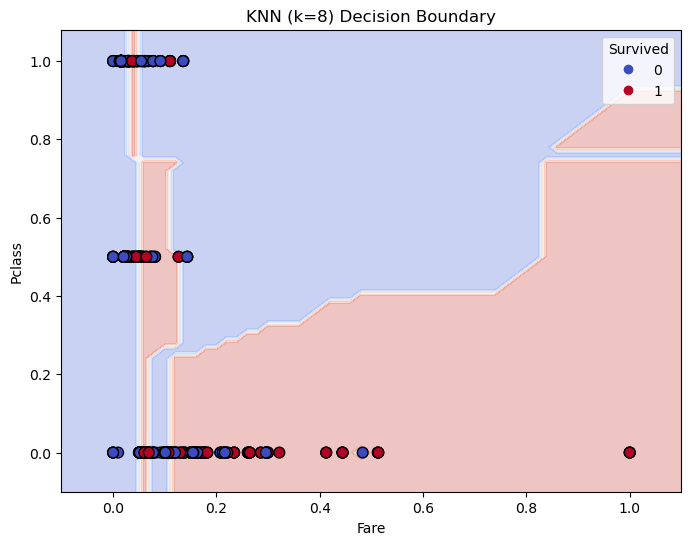

Decision boundary for features: Fare & FamilySize


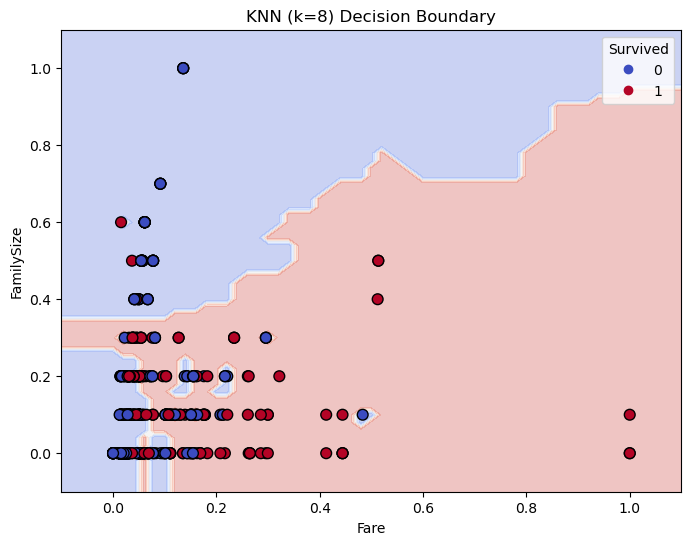

Decision boundary for features: Pclass & FamilySize


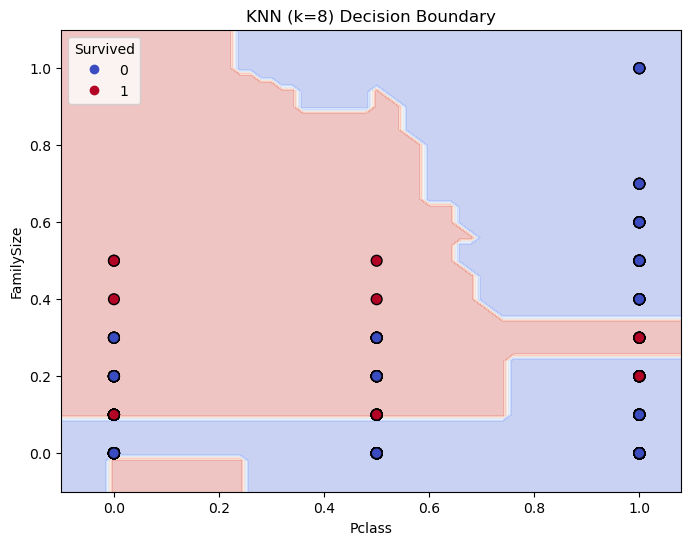

In [12]:


def plot_knn_decision_boundary(X, y, k=8, feature_names=None):
    # Select only two features for visualization
    if X.shape[1] > 2:
        X_vis = X.iloc[:, :2]
        if feature_names is None:
            feature_names = X_vis.columns.tolist()
    else:
        X_vis = X
        if feature_names is None:
            feature_names = X.columns.tolist()

    # Fit KNN
    knn_vis = KNeighborsClassifier(n_neighbors=k, weights='distance', metric='manhattan')
    knn_vis.fit(X_vis, y)

    # Create meshgrid
    h = 0.02
    x_min, x_max = X_vis.iloc[:, 0].min() - 0.1, X_vis.iloc[:, 0].max() + 0.1
    y_min, y_max = X_vis.iloc[:, 1].min() - 0.1, X_vis.iloc[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    mesh_points = pd.DataFrame(np.c_[xx.ravel(), yy.ravel()], columns=feature_names)
    Z = knn_vis.predict(mesh_points)
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    scatter = plt.scatter(X_vis.iloc[:, 0], X_vis.iloc[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolor='k', s=60)
    plt.xlabel(feature_names[0])
    plt.ylabel(feature_names[1])
    plt.title(f"KNN (k={k}) Decision Boundary")
    plt.legend(*scatter.legend_elements(), title="Survived")
    plt.show()
    
    
    
feature_pairs = [
    ('Fare', 'Pclass'),
    ('Fare', 'FamilySize'),
    ('Pclass', 'FamilySize')
]

for pair in feature_pairs:
    X_plot = X[list(pair)]
    y_plot = train_df1['Survived']
    print(f"Decision boundary for features: {pair[0]} & {pair[1]}")
    plot_knn_decision_boundary(X_plot, y_plot, k=8)

In [13]:
# --- Usage examples ---

# Add FamilySize feature
train_df2 = add_family_size(train_df)
train_df2 = add_is_alone(train_df2)
train_df2 = add_age_group(train_df2)
train_df2 = add_fare_group(train_df2)


train_df2


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived,FareGroup,FamilySize,IsAlone,AgeGroup
0,1,0,54.000000,1,0,78.2667,1,1,2,2,0,4
1,2,0,45.000000,0,0,13.5000,0,1,1,1,1,4
2,3,1,20.000000,0,0,9.5000,0,0,1,1,1,3
3,3,1,36.000000,0,0,7.8958,0,0,1,1,1,4
4,3,1,22.000000,0,0,8.0500,0,0,1,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...
707,1,1,54.000000,0,0,51.8625,0,0,2,1,1,4
708,3,1,14.000000,5,2,46.9000,0,0,1,8,0,2
709,2,0,6.000000,0,1,33.0000,0,1,1,2,0,1
710,2,1,29.699118,0,0,0.0000,0,0,1,1,1,3


In [14]:
# Example2 usage:
# List of numeric features to normalize
numeric_features2 = ['Age', 'Fare', 'FamilySize', 'SibSp', 'Parch']

# Create a normalized DataFrame with only the numeric features
normalized_df = create_normalized_data(train_df2, numeric_features2)
normalized_df

,Age,Fare,FamilySize,SibSp,Parch
0,0.672255,0.152766,0.1,0.125,0.000000
1,0.558805,0.026350,0.0,0.000,0.000000
2,0.243666,0.018543,0.0,0.000,0.000000
3,0.445355,0.015412,0.0,0.000,0.000000
4,0.268877,0.015713,0.0,0.000,0.000000
...,...,...,...,...,...
707,0.672255,0.101229,0.0,0.000,0.000000
708,0.168032,0.091543,0.7,0.625,0.333333
709,0.067188,0.064412,0.1,0.000,0.166667
710,0.365929,0.000000,0.0,0.000,0.000000


In [15]:


# Use the normalized features and the target variable
X = normalized_df  # normalized features DataFrame
y = train_df2["Survived"]  # target labels

# Split the normalized data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Define the range of k values to search
param_grid = {'n_neighbors': list(range(1, 6))}

# Create the KNN model
knn = KNeighborsClassifier(n_neighbors=5, weights='distance', metric='manhattan')
knn.fit(X_train, y_train)

# Set up 5-fold stratified cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Grid Search with 5-fold cross-validation and f1-macro as the scoring metric
grid = GridSearchCV(knn, param_grid, cv=cv, scoring='f1_macro', return_train_score=True)
grid.fit(X_train, y_train)

# --- PRETTY F1-MACRO TABLES ---
# Collect all F1 scores for each k and fold into a DataFrame for pretty display
f1_scores_dict = {}
for i, k in enumerate(param_grid['n_neighbors']):
    f1_scores_dict[f'k={k}'] = [grid.cv_results_[f'split{fold}_test_score'][i] for fold in range(cv.get_n_splits())]
f1_df = pd.DataFrame(f1_scores_dict, index=[f'Fold {i+1}' for i in range(cv.get_n_splits())])

print("Cross-validation F1-macro scores (rows = folds, columns = k):")
display(f1_df)  # If running in Jupyter, this will show a nice table



# Print the best result
print(f"\nBest k: {grid.best_params_['n_neighbors']}")
print(f"Best cross-validated f1-macro: {grid.best_score_:.3f}")

# Evaluate on the test set with the best k
y_pred = grid.predict(X_test)
test_f1 = f1_score(y_test, y_pred, average='macro')
print(f"Test f1-macro with best k: {test_f1:.3f}")

Cross-validation F1-macro scores (rows = folds, columns = k):


,k=1,k=2,k=3,k=4,k=5
Fold 1,0.637564,0.637564,0.632850,0.652982,0.634225
Fold 2,0.559846,0.546474,0.580694,0.546474,0.586920
Fold 3,0.615467,0.607458,0.637224,0.622292,0.644737
Fold 4,0.666883,0.679563,0.668467,0.664903,0.679563
Fold 5,0.707718,0.712907,0.699668,0.655488,0.663261



Best k: 3
Best cross-validated f1-macro: 0.644
Test f1-macro with best k: 0.652


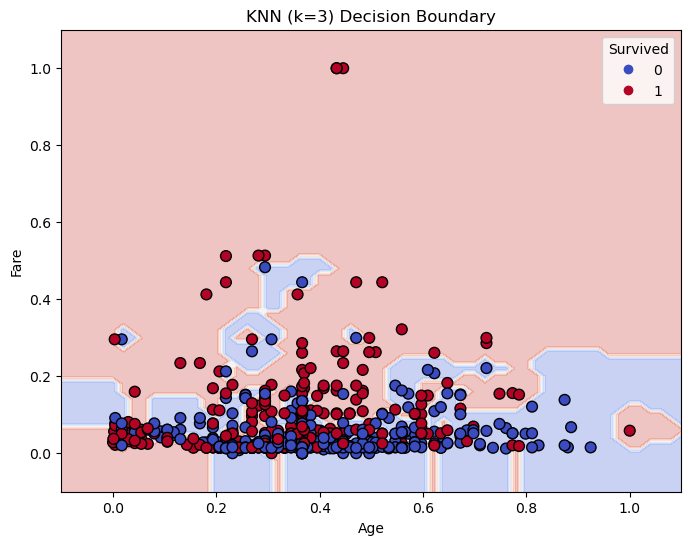

In [16]:


def plot_knn_decision_boundary(X, y, k=3, feature_names=None):
    # Select only two features for visualization
    if X.shape[1] > 2:
        X_vis = X.iloc[:, :2]
        if feature_names is None:
            feature_names = X_vis.columns.tolist()
    else:
        X_vis = X
        if feature_names is None:
            feature_names = X.columns.tolist()

    # Fit KNN
    knn_vis = KNeighborsClassifier(n_neighbors=k, weights='distance', metric='manhattan')
    knn_vis.fit(X_vis, y)

    # Create meshgrid
    h = 0.02
    x_min, x_max = X_vis.iloc[:, 0].min() - 0.1, X_vis.iloc[:, 0].max() + 0.1
    y_min, y_max = X_vis.iloc[:, 1].min() - 0.1, X_vis.iloc[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    mesh_points = pd.DataFrame(np.c_[xx.ravel(), yy.ravel()], columns=feature_names)
    Z = knn_vis.predict(mesh_points)
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    scatter = plt.scatter(X_vis.iloc[:, 0], X_vis.iloc[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolor='k', s=60)
    plt.xlabel(feature_names[0])
    plt.ylabel(feature_names[1])
    plt.title(f"KNN (k={k}) Decision Boundary")
    plt.legend(*scatter.legend_elements(), title="Survived")
    plt.show()
    
    
plot_knn_decision_boundary(normalized_df, train_df2["Survived"], k=3)

In [17]:


# Feature engineering functions (assume already defined: add_family_size, add_is_alone, add_age_group, add_fare_group)

# Define feature sets to test
feature_sets = [
    (0, ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']),
    (1, ['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'FamilySize']),
    (2, ['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'IsAlone']),
    (3, ['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'FamilySize', 'IsAlone']),
    (4, ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'FamilySize', 'IsAlone', 'AgeGroup', 'FareGroup']),
    (5, ['Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Embarked', 'FamilySize', 'IsAlone', 'AgeGroup']),
    (6, ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked', 'FamilySize', 'IsAlone', 'FareGroup']),
    (7, ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'FamilySize', 'IsAlone', 'AgeGroup', 'FareGroup'])
]

In [18]:
# Decision Tree only

# Define a list of Decision Tree models with different hyperparameters to test.
dt_models = [
    ('DecisionTree', DecisionTreeClassifier(), {
        'clf__max_depth': [4, 6],           # Maximum depth of the tree
        'clf__min_samples_split': [10, 20], # Minimum samples required to split an internal node
        'clf__min_samples_leaf': [2],       # Minimum samples required to be at a leaf node
    }),
]

results_dt = []  # List to store results for each feature set and model
y = train_df2['Survived']  # Target variable

# Loop over all feature sets defined earlier
for idx, features in feature_sets:
    X = train_df2[features]  # Select the features for this combination
    for model_name, model, param_grid in dt_models:
        steps = [('clf', model)]  # Create a pipeline step for the classifier
        pipe = Pipeline(steps)
        scorer = make_scorer(f1_score, average='macro')  # Use macro F1-score for evaluation
        # Run grid search with cross-validation
        grid = GridSearchCV(pipe, param_grid, scoring=scorer, cv=5, return_train_score=True)
        grid.fit(X, y)  # Fit the model on the data
        best_idx = grid.best_index_  # Index of the best hyperparameter combination
        # Collect F1 scores for each fold
        fold_scores = [grid.cv_results_[f'split{fold}_test_score'][best_idx] for fold in range(5)]
        # Store results in a dictionary
        result_row = {
            'features_combo_num': idx,                # Feature set index
            'model': model_name,             # Model name
            'best_score': grid.best_score_,  # Best average cross-validated F1 score
            'best_params': grid.best_params_ # Best hyperparameters
        }
        for fold in range(5):
            result_row[f'cross{fold+1}_f1'] = fold_scores[fold]  # F1 score for each fold
        results_dt.append(result_row)  # Add results to the list

# Convert results to a DataFrame for easy viewing and sorting
df_results_dt = pd.DataFrame(results_dt)
df_results_dt = df_results_dt.sort_values(by='best_score', ascending=False)

# Print the best hyperparameters for the top-performing model
best_row = df_results_dt.iloc[0]
print("\nBest hyperparameters for the top result:")
print(best_row['best_params'])

# Print the results table with F1 scores for each fold
print("Decision Tree Results:")
df_results_dt[['features_combo_num', 'model', 'best_score', 'cross1_f1', 'cross2_f1', 'cross3_f1', 'cross4_f1', 'cross5_f1']]


Best hyperparameters for the top result:
{'clf__max_depth': 4, 'clf__min_samples_leaf': 2, 'clf__min_samples_split': 10}
Decision Tree Results:


,features_combo_num,model,best_score,cross1_f1,cross2_f1,cross3_f1,cross4_f1,cross5_f1
4,4,DecisionTree,0.809573,0.796843,0.836350,0.778862,0.826230,0.809580
6,6,DecisionTree,0.808765,0.796843,0.841989,0.778862,0.847016,0.779113
1,1,DecisionTree,0.795401,0.776841,0.828278,0.764120,0.821944,0.785822
3,3,DecisionTree,0.795401,0.776841,0.828278,0.764120,0.821944,0.785822
0,0,DecisionTree,0.795291,0.776841,0.836350,0.764120,0.821944,0.777201
7,7,DecisionTree,0.793677,0.776841,0.828278,0.764120,0.821944,0.777201
5,5,DecisionTree,0.792825,0.776841,0.778892,0.764120,0.831717,0.812556
2,2,DecisionTree,0.792052,0.776841,0.836350,0.755976,0.813893,0.777201


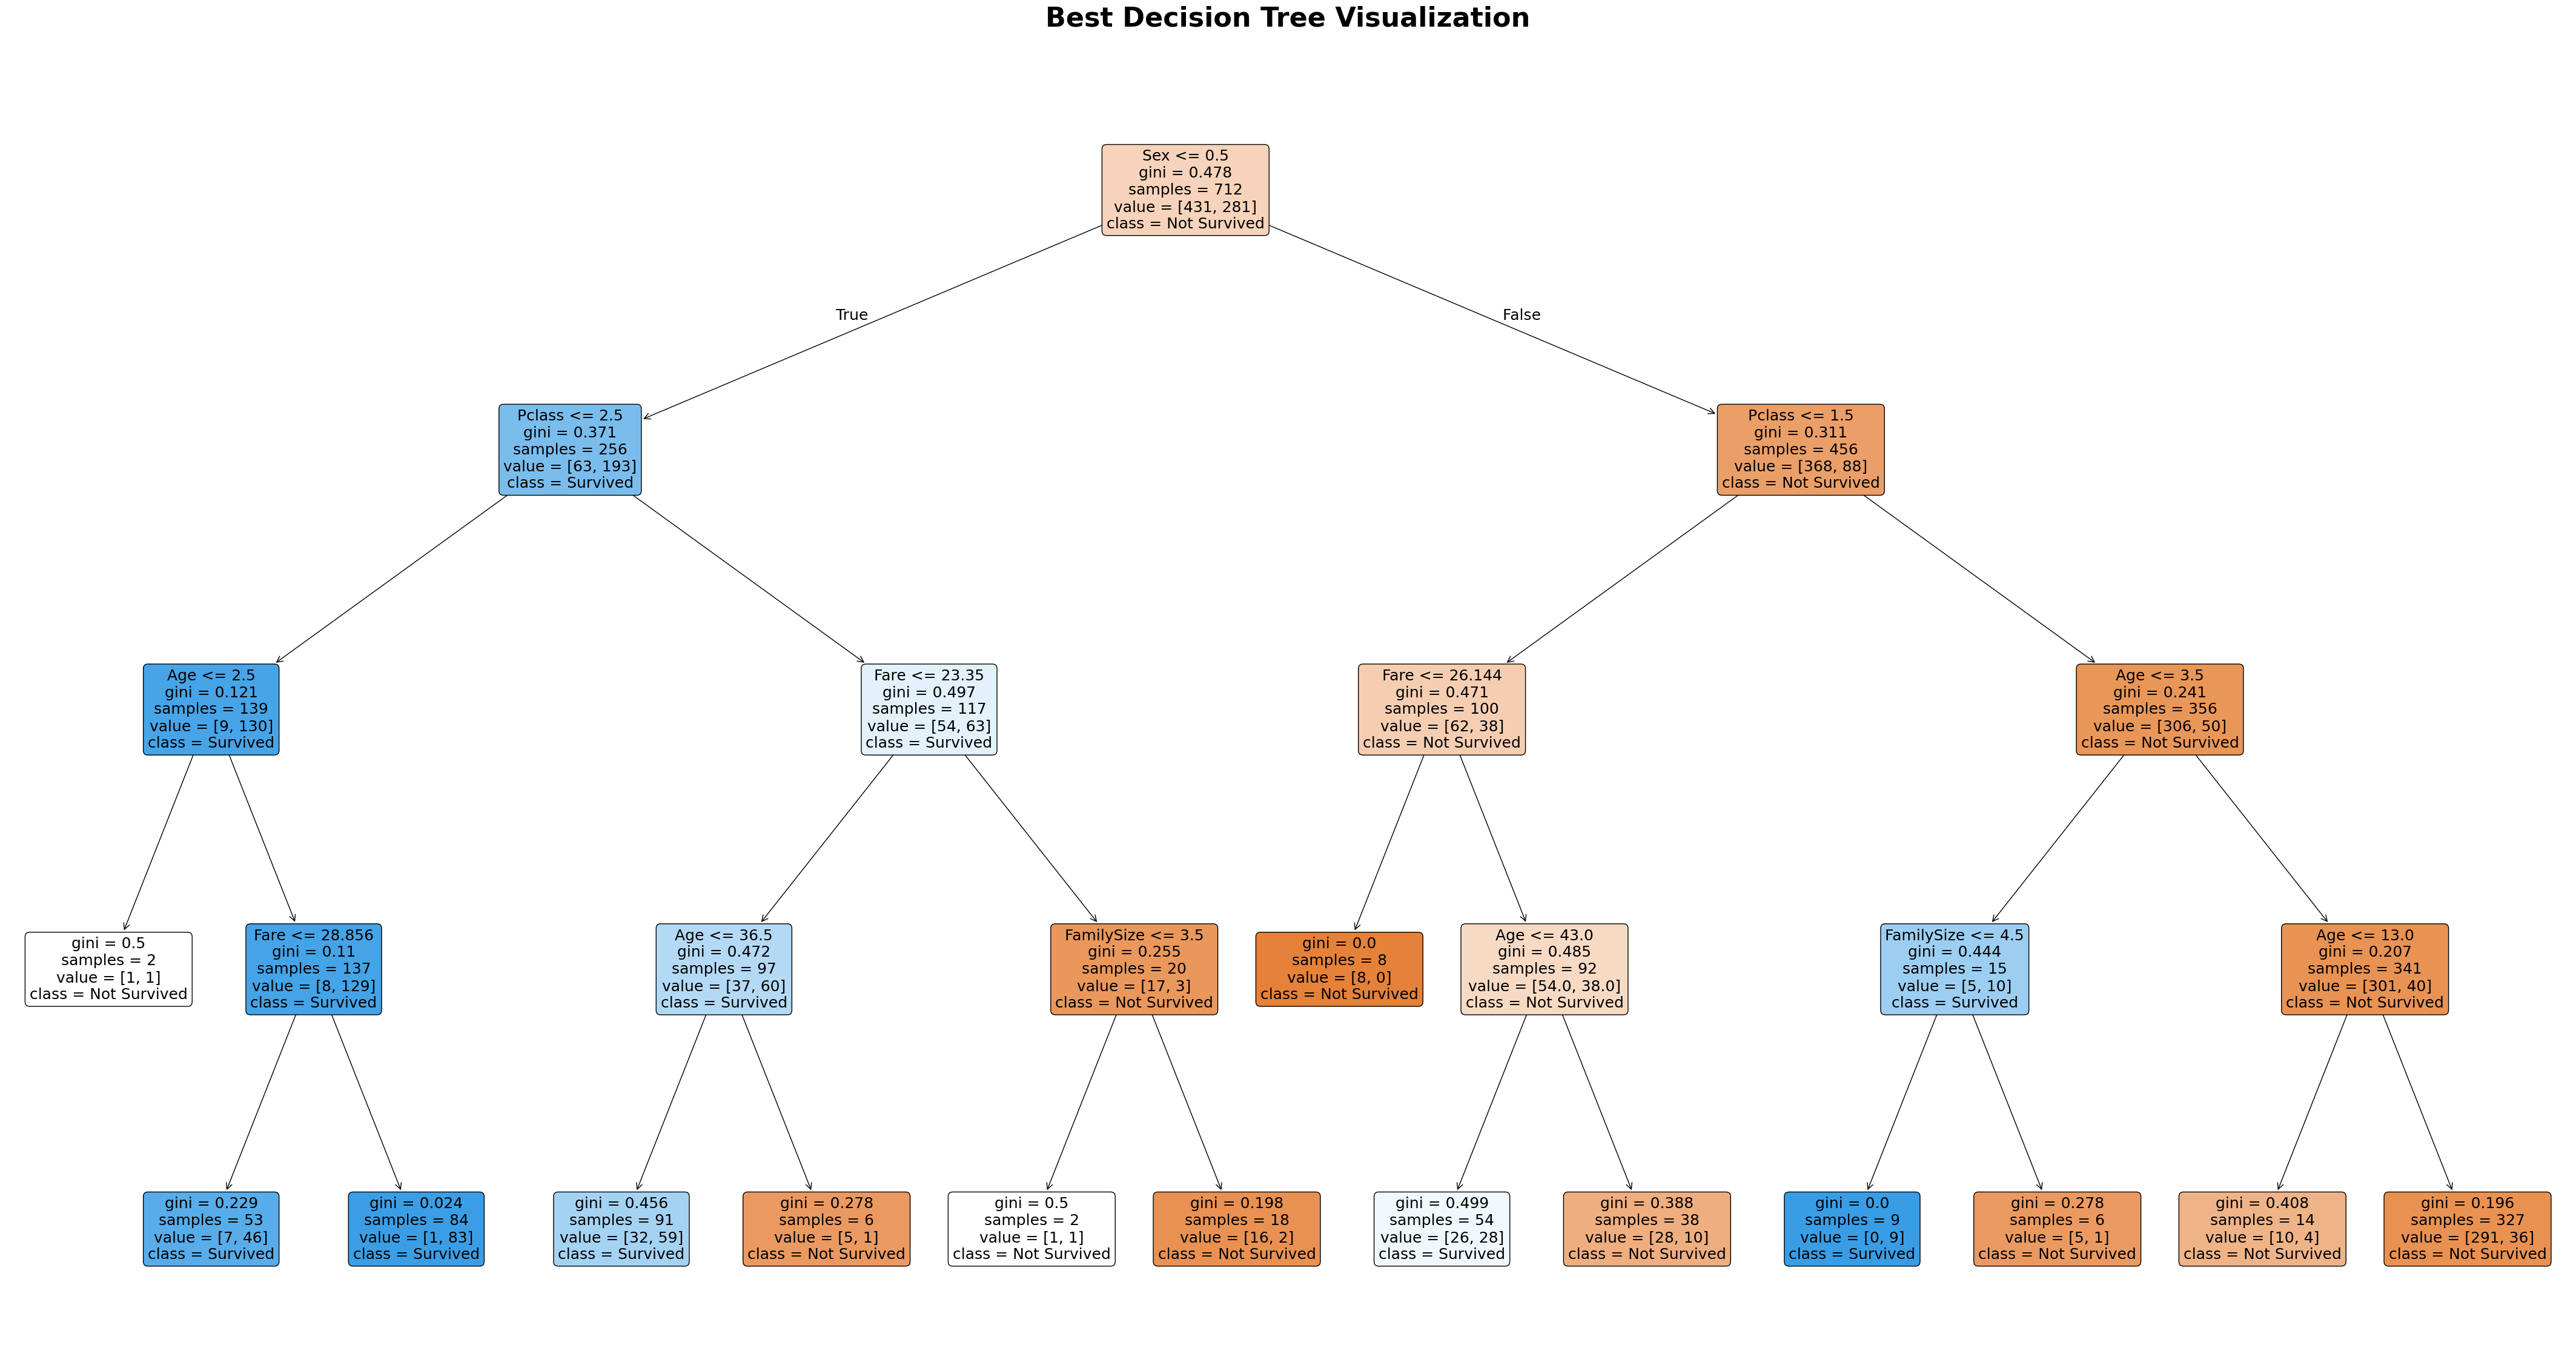

In [19]:


# Select the best feature set and parameters from the results table
best_row = df_results_dt.iloc[0]
best_features = feature_sets[best_row['features_combo_num'] - 1][1]  # features_combo_num is 1-based
best_params = best_row['best_params']

# Prepare the data for the tree
X_best = train_df2[best_features]
y_best = train_df2['Survived']

# Create and fit the DecisionTreeClassifier with the best parameters
dt_best = DecisionTreeClassifier(
    max_depth=best_params.get('clf__max_depth', None),
    min_samples_split=best_params.get('clf__min_samples_split', 2),
    min_samples_leaf=best_params.get('clf__min_samples_leaf', 1),
    random_state=42
)
dt_best.fit(X_best, y_best)

# --- Visualization in a separate, well-spaced plot cell ---
# This will create a very large, clear, and separate plot for the decision tree.
fig = plt.figure(figsize=(44, 24))  # Even larger figure for more spacing
ax = fig.add_subplot(1, 1, 1)
tree.plot_tree(
    dt_best,
    feature_names=best_features,
    class_names=['Not Survived', 'Survived'],
    filled=True,
    rounded=True,
    fontsize=18,  # Larger font for readability
    ax=ax
)
plt.title("Best Decision Tree Visualization", fontsize=32, fontweight='bold', pad=40)
plt.subplots_adjust(left=0.01, right=0.99, top=0.90, bottom=0.01, wspace=0.4, hspace=0.4)  # Extra spacing
plt.tight_layout(pad=6.0)  # Add even more padding
plt.show()

In [20]:
# --- Random Forest Model Selection and Evaluation ---

# Define a list of Random Forest models with different hyperparameters to test.
rf_models = [
    ('RandomForest', RandomForestClassifier(random_state=42), {
        'clf__num_of_trees': [50],  # Number of trees in the forest (will be renamed to n_estimators)
        'clf__max_depth': [5,10],   # Maximum depth of each tree
        'clf__min_samples_split': [2, 5]  # Minimum samples required to split an internal node
    }),
]

results_rf = []  # List to store results for each feature set and model

# Set up 5-fold stratified cross-validation to ensure balanced class distribution in each fold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Loop over all feature sets defined earlier
for idx, features in feature_sets:
    X = train_df2[features]  # Select the features for this combination
    for model_name, model, param_grid in rf_models:
        # Rename 'num_of_trees' to 'n_estimators' as required by RandomForestClassifier
        if 'clf__num_of_trees' in param_grid:
            param_grid = param_grid.copy()
            param_grid['clf__n_estimators'] = param_grid.pop('clf__num_of_trees')
        steps = [('clf', model)]  # Create a pipeline step for the classifier
        pipe = Pipeline(steps)
        scorer = make_scorer(f1_score, average='macro')  # Use macro F1-score for evaluation
        # Run grid search with cross-validation
        grid = GridSearchCV(pipe, param_grid, scoring=scorer, cv=cv, return_train_score=True)
        grid.fit(X, y)  # Fit the model on the data
        best_idx = grid.best_index_  # Index of the best hyperparameter combination
        # Collect F1 scores for each fold
        fold_scores = [grid.cv_results_[f'split{fold}_test_score'][best_idx] for fold in range(5)]
        # Store results in a dictionary
        result_row = {
            'features_combo_num': idx,
            'model': model_name,
            'best_score': grid.best_score_,
            'best_params': grid.best_params_
        }
        for fold in range(5):
            result_row[f'cross{fold+1}_f1'] = fold_scores[fold]
        results_rf.append(result_row)  # Add results to the list

# Convert results to a DataFrame for easy viewing and sorting
df_results_rf = pd.DataFrame(results_rf)
df_results_rf = df_results_rf.sort_values(by='best_score', ascending=False)


# Print the best hyperparameters for the top-performing model
best_row = df_results_rf.iloc[0]
print("\nBest hyperparameters for the top result:")
print(best_row['best_params'])

# Print the results table with F1 scores for each fold
print("Random Forest Results:")
df_results_rf[['features_combo_num', 'model', 'best_score', 'cross1_f1', 'cross2_f1', 'cross3_f1', 'cross4_f1', 'cross5_f1']]


Best hyperparameters for the top result:
{'clf__max_depth': 5, 'clf__min_samples_split': 2, 'clf__n_estimators': 50}
Random Forest Results:


,features_combo_num,model,best_score,cross1_f1,cross2_f1,cross3_f1,cross4_f1,cross5_f1
6,6,RandomForest,0.800958,0.788462,0.770228,0.821944,0.811120,0.813035
5,5,RandomForest,0.797154,0.795162,0.775157,0.796010,0.790825,0.828615
4,4,RandomForest,0.796789,0.781794,0.768548,0.811120,0.792268,0.830217
0,0,RandomForest,0.795035,0.781794,0.776841,0.804325,0.792268,0.819946
7,7,RandomForest,0.793682,0.788462,0.747087,0.851620,0.754338,0.826906
1,1,RandomForest,0.792771,0.809216,0.760168,0.793605,0.752574,0.848291
2,2,RandomForest,0.788398,0.794540,0.783480,0.778862,0.750678,0.834429
3,3,RandomForest,0.782259,0.790147,0.761964,0.804325,0.752574,0.802283


## Part 4 - Training 
Use the best combination of feature engineering, model (algorithm and hyperparameters) from the experiment part (part 3)

In [21]:
def train_best_rf_model(train_df2, df_results_rf, feature_sets):
    # This function trains the best Random Forest model on the entire training set.
    # It returns the trained model, the feature names used, and the best hyperparameters.
    
    # Get the row with the best cross-validated score from the results DataFrame
    best_row = df_results_rf.iloc[0]
    # Extract the feature names for the best feature combination (features_combo_num is 1-based)
    best_features = feature_sets[best_row['features_combo_num'] - 1][1]
    # Extract the best hyperparameters found by GridSearchCV
    best_params = best_row['best_params']

    # Create the Random Forest model with the best hyperparameters
    rf_best = RandomForestClassifier(
        n_estimators=best_params.get('clf__n_estimators', 50),
        max_depth=best_params.get('clf__max_depth', None),
        min_samples_split=best_params.get('clf__min_samples_split', 2),
        random_state=42
    )
    # Select the relevant features and target from the training set
    X_best = train_df2[best_features]
    y_best = train_df2['Survived']
    # Fit the model on the entire training set
    rf_best.fit(X_best, y_best)
    # Return the trained model, feature names, and best parameters
    return rf_best, best_features, best_params

# Example usage:
rf_model, rf_features, rf_params = train_best_rf_model(train_df2, df_results_rf, feature_sets)

print(rf_features)
print(rf_params)
print(rf_model)


        

['Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Embarked', 'FamilySize', 'IsAlone', 'AgeGroup']
{'clf__max_depth': 5, 'clf__min_samples_split': 2, 'clf__n_estimators': 50}
RandomForestClassifier(max_depth=5, n_estimators=50, random_state=42)


In [22]:
# Show cross-validation results for the best Random Forest model
best_row = df_results_rf.iloc[0]  # Select the row with the best average F1-macro score

print("F1-macro for each fold in cross-validation:")  # Print header in English
for i in range(1, 6):
    # Print the F1-macro score for each fold
    print(f"Fold {i}: {best_row[f'cross{i}_f1']:.3f}")

# Print the average F1-macro score across all folds
print(f"\nAverage F1-macro: {best_row['best_score']:.3f}")


F1-macro for each fold in cross-validation:
Fold 1: 0.788
Fold 2: 0.770
Fold 3: 0.822
Fold 4: 0.811
Fold 5: 0.813

Average F1-macro: 0.801


## Part 5 - Apply on test and show model performance estimation

In [23]:
# --- Feature engineering for test set ---
# Apply the same feature engineering steps to the test set as were used for the training set
test_df1 = add_family_size(test_df)
test_df1 = add_is_alone(test_df1)
test_df1 = add_age_group(test_df1)
test_df1 = add_fare_group(test_df1)

# --- Use the best model, features, and params from part 4 ---
# The variables rf_model, rf_features, and rf_params were already created in the previous cell

# --- Predict on test set ---
# Select the same features as used for training and predict the labels for the test set
X_test_final = test_df1[rf_features]
y_test_pred = rf_model.predict(X_test_final)

# --- Show predictions and correctness for samples 0 to 4 ---
print("Predictions for test set samples 0 to 4:", y_test_pred[0:5])

# If the test set contains the true labels (column 'Survived'), show correctness for each prediction
if 'Survived' in test_df1.columns:
    true_labels = test_df1['Survived'].values[0:5]
    pred_labels = y_test_pred[0:5]
    correctness = (pred_labels == true_labels).astype(int)
    print("True labels for test set samples 0 to 4:", true_labels)
    print("Correctness (1=correct, 0=wrong):       ", correctness)
    accuracy_5 = correctness.mean()
    print(f"Accuracy for samples 0 to 4: {accuracy_5:.2f}")
else:
    print("True labels for the test set are not available, so correctness cannot be calculated.")

# --- Show model quality from cross-validation ---
print("\nF1-macro for each fold in cross-validation:")
for i in range(1, 6):
    print(f"Fold {i}: {df_results_rf.iloc[0][f'cross{i}_f1']:.3f}")
print(f"\nAverage F1-macro: {df_results_rf.iloc[0]['best_score']:.3f}")

# The comparison and accuracy shown above are for test set samples with indices 0 to 4 (5 samples).

Predictions for test set samples 0 to 4: [0 0 0 1 0]
True labels for test set samples 0 to 4: [0 0 0 0 1]
Correctness (1=correct, 0=wrong):        [1 1 1 0 0]
Accuracy for samples 0 to 4: 0.60

F1-macro for each fold in cross-validation:
Fold 1: 0.788
Fold 2: 0.770
Fold 3: 0.822
Fold 4: 0.811
Fold 5: 0.813

Average F1-macro: 0.801


In [24]:
# --- Feature engineering for test set ---
# Apply the same feature engineering steps to the test set as were used for the training set
test_df1 = add_family_size(test_df)
test_df1 = add_is_alone(test_df1)
test_df1 = add_age_group(test_df1)
test_df1 = add_fare_group(test_df1)

# --- Use the best model, features, and params from part 4 ---
# The variables rf_model, rf_features, and rf_params were already created in the previous cell

# --- Predict on test set ---
# Select the same features as used for training and predict the labels for the test set
X_test_final = test_df1[rf_features]
y_test_pred = rf_model.predict(X_test_final)

# --- Show predictions and correctness for samples 40 to 69 ---
print("Predictions for test set samples 40 to 69:", y_test_pred[40:70])

# If the test set contains the true labels (column 'Survived'), show correctness for each prediction
if 'Survived' in test_df1.columns:
    true_labels = test_df1['Survived'].values[40:70]
    pred_labels = y_test_pred[40:70]
    correctness = (pred_labels == true_labels).astype(int)
    print("True labels for test set samples 40 to 69:", true_labels)
    print("Correctness (1=correct, 0=wrong):         ", correctness)
    accuracy_30 = correctness.mean()
    print(f"Accuracy for samples 40 to 69: {accuracy_30:.2f}")
else:
    print("True labels for the test set are not available, so correctness cannot be calculated.")

# --- Show model quality from cross-validation ---
print("\nModel quality (F1-macro) in each fold of cross-validation:")
for i in range(1, 6):
    print(f"Fold {i}: {df_results_rf.iloc[0][f'cross{i}_f1']:.3f}")
print(f"\nAverage F1-macro: {df_results_rf.iloc[0]['best_score']:.3f}")

# The comparison and accuracy shown above are for test set samples with indices 40 to 69 (30 samples).



Predictions for test set samples 40 to 69: [0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0]
True labels for test set samples 40 to 69: [1 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1]
Correctness (1=correct, 0=wrong):          [0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0]
Accuracy for samples 40 to 69: 0.83

Model quality (F1-macro) in each fold of cross-validation:
Fold 1: 0.788
Fold 2: 0.770
Fold 3: 0.822
Fold 4: 0.811
Fold 5: 0.813

Average F1-macro: 0.801
